In [1]:
# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (16)

**16/01/2023**

## Clasificación con Redes Neuronales (Neural Network Clasification) 

Las redes neuronales artificiales están basadas en el funcionamiento de las redes de neuronas biológicas. Podemos aplicar estas estructuras para crear **un modelo de clasificación basado en el funcionamiento de las redes neuronales artificiales**.

### Procesado de información de una neurona artificial
Aquí se representa **el procesado de los datos al atravesar una neurona** dentro de la estructura de una red neuronal artificial:

![image-3.png](attachment:image-3.png)

### Valores de salida y pesos de las redes neuronales

Las respuestas calculadas por las redes o los valores de salida pueden ser:
* **continuos**, como el precio de una compra determinada o una vivienda! 
* **categóricos**, como el producto que más se venderá el próximo año o la especie de una flor!.
* **binarios**, como por ejemplo si una persona padece de una enfermedad o no. (_el caso binario es un caso particular donde tenemos dos categorías_).

Para poder llevar a cabo el procesado, cada conexión entre las neuronas llamada ***sinapsis*** tendrá asignada un valor o un **peso** que equivale a la **fuerza** de la señal que se trasmite a otras. El ajuste de estos pesos para tener una red neuronal que haga lo que queremos es fundamental. 

Existen **distintos métodos para ajustar estos pesos**, como **el descenso de gradiente (Gradient Descent)** y **el Backpropagation**. 

### Ejemplo de la calidad del aire

En los últimos años, los **altos niveles de contaminación** durante ciertos periodos secos en **Madrid** ha obligado a las autoridades a tomar medidas contra el uso de automóviles en el centro de la ciudad, y ha sido utilizado como razón para **proponer modificaciones drásticas en el urbanismo de la ciudad**. 

Gracias a la **web de [Datos Abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.400a817358ce98c34e937436a8a409a0/?vgnextoid=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**, los datos de calidad del aire están públicamente disponibles e incluyen **datos históricos diarios y horarios de los niveles registrados desde 2001 hasta 2018** y la lista de estaciones que se utilizan para el análisis de contaminación.

Vamos a utilizar **una muestra** que se ha preparado en base a estos datos que muestran la **calidad del aire** en varias estaciones de **Madrid** según diferentes variables.

In [2]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos preparados y preprocesados para el modelo

In [4]:
# Cargar el dataset desde un archivo

df_aire_calidad = pd.read_csv('Calidad_aire_procesado.csv')

In [5]:
# Consultar los registros del DataFrame
df_aire_calidad

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
0,635,60.589582,154.00,697.00,259.00,847.00,845.00,46.00,6.00,493.727273,...,21.0,21.0,21.0,10.9,10,1,0,1,1,1
1,635,60.589582,159.00,753.00,282.00,854.00,929.00,48.00,8.00,500.659091,...,20.6,20.6,20.6,11.1,10,1,1,1,1,1
2,635,60.589582,111.00,851.00,235.00,678.00,1056.00,41.00,5.00,458.159091,...,20.1,20.1,20.1,11.2,10,1,2,1,1,1
3,635,60.589582,70.00,557.00,150.00,511.00,719.00,33.00,4.00,338.454545,...,19.7,19.7,19.7,11.4,10,1,3,1,1,0
4,635,60.589582,66.00,532.00,167.00,439.00,632.00,25.00,5.00,282.681818,...,19.5,19.5,19.5,11.2,10,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,599,323.225854,521.75,882.50,1427.00,113.75,1166.50,14.25,45.50,601.100000,...,11.0,11.0,12.1,-7.0,2,22,16,5,1,1
49250,599,323.225854,497.00,1001.75,1413.75,135.00,1144.25,18.25,45.75,641.575000,...,9.4,9.4,11.0,-6.6,2,22,17,5,1,1
49251,599,323.225854,559.75,1085.75,1487.50,138.25,1206.25,20.00,48.25,699.375000,...,7.7,7.7,9.8,-6.2,2,22,18,5,1,1
49252,599,323.225854,518.50,1024.75,1535.75,139.00,1224.25,19.25,49.75,673.100000,...,6.6,6.6,8.8,-5.9,2,22,19,5,3,1


In [6]:
# La información útil sobre los datos guardados en formato DataFrame
df_aire_calidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49254 entries, 0 to 49253
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ALTITUD                      49254 non-null  int64  
 1   Distancia_Pto_trafico1       49254 non-null  float64
 2   Intensidad_Pto_trafico1      49254 non-null  float64
 3   Intensidad_Pto_trafico2      49254 non-null  float64
 4   Intensidad_Pto_trafico3      49254 non-null  float64
 5   Intensidad_Pto_trafico4      49254 non-null  float64
 6   Intensidad_Pto_trafico5      49254 non-null  float64
 7   Carga_Pto_trafico4           49254 non-null  float64
 8   Carga_Pto_trafico3           49254 non-null  float64
 9   Intensidad_mediaR1_500       49254 non-null  float64
 10  Intensidad_mediaR3_750_1000  49254 non-null  float64
 11  Intensidad_mediaR6_2000      49254 non-null  float64
 12  Intensidad_minR1_500         49254 non-null  float64
 13  Intensidad_minR2

### Planteamiento del ejercicio de clasificación

Se ha creado una variable objetivo de nombre ***Escenario*** con 2 clases como 0,1 del modo que:  

* El **nivel 0** se corresponda a los valores **por debajo del percentil 25 o el primer cuartil (Q1)** de la variable objetivo original (`Calidad_NO2`).    
* El **nivel 1** se corresponde a los valores **por encima del percentil 25 o el primer cuartil (Q1)**.  

Procedemos a dividir el datset en conjuntos de train y test (usualmente con un reparto de 80% - 20%).  

**Vamos a intentar predecir si la calidad de aire de las distintas zonas está en el nivel 0, 1.**


In [7]:
df_aire_calidad.describe()

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000
mean,661.735027,140.003163,348.427424,307.270861,465.780060,396.266552,415.983267,24.459218,19.582406,388.981257,...,10.142878,10.158558,11.595022,2.455007,5.857250,15.798656,11.479433,3.972429,1.639258,0.759857
std,34.497321,98.958425,385.365535,311.674022,781.171063,363.917301,395.422520,18.969057,17.162813,304.860574,...,7.045263,7.096225,6.109079,4.533624,4.334602,8.726627,6.935243,2.008118,1.022857,0.427174
min,599.000000,48.351595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,...,-2.600000,-2.600000,0.300000,-11.700000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,635.000000,71.219285,61.500000,71.000000,89.250000,84.000000,72.750000,8.000000,6.000000,146.391667,...,4.800000,4.800000,7.100000,-0.800000,2.000000,8.000000,5.000000,2.000000,1.000000,1.000000
50%,670.000000,86.018742,208.750000,193.000000,269.000000,276.875000,309.000000,20.000000,14.250000,326.584350,...,8.700000,8.700000,10.300000,2.400000,4.000000,16.000000,11.000000,4.000000,2.000000,1.000000
75%,693.000000,168.527832,476.750000,446.500000,669.750000,649.000000,647.000000,38.250000,29.000000,560.473438,...,14.500000,14.500000,14.700000,5.800000,11.000000,23.000000,17.000000,6.000000,2.000000,1.000000
max,708.000000,407.571507,2844.250000,1950.000000,30660.000000,3121.750000,2307.000000,100.000000,100.000000,2632.795833,...,31.400000,33.500000,31.400000,16.500000,12.000000,31.000000,23.000000,7.000000,3.000000,1.000000


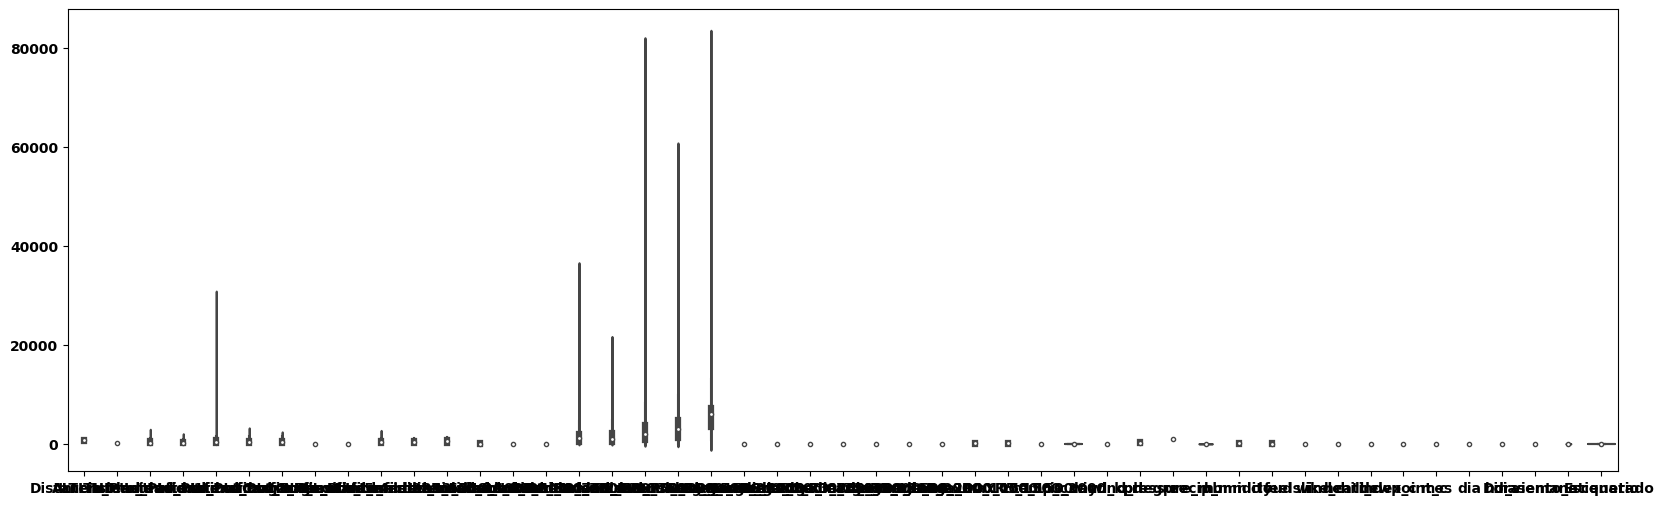

In [8]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_aire_calidad, orient='v')
plt.show()

In [9]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

Se puede observar la necesidad de llevar todas las variables de entrada a una escala estándar.

In [10]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[0.33027523, 0.03406823, 0.05414433, ..., 0.        , 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.05590226, ..., 0.04347826, 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.03902611, ..., 0.08695652, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.76519772, 0.19680056, ..., 0.7826087 , 0.66666667,
        0.33333333],
       [0.        , 0.76519772, 0.18229762, ..., 0.82608696, 0.66666667,
        1.        ],
       [0.        , 0.76519772, 0.16603674, ..., 0.86956522, 0.66666667,
        0.        ]])

In [11]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,0.330275,0.034068,0.054144,0.357436,0.008447,0.271322,0.366277,0.4600,0.0600,0.186757,...,0.00,0.694118,0.653740,0.665595,0.801418,0.818182,0.0,0.000000,0.000000,0.333333
1,0.330275,0.034068,0.055902,0.386154,0.009198,0.273565,0.402687,0.4800,0.0800,0.189393,...,0.00,0.682353,0.642659,0.652733,0.808511,0.818182,0.0,0.043478,0.000000,0.333333
2,0.330275,0.034068,0.039026,0.436410,0.007665,0.217186,0.457737,0.4100,0.0500,0.173235,...,0.00,0.667647,0.628809,0.636656,0.812057,0.818182,0.0,0.086957,0.000000,0.333333
3,0.330275,0.034068,0.024611,0.285641,0.004892,0.163690,0.311660,0.3300,0.0400,0.127725,...,0.00,0.655882,0.617729,0.623794,0.819149,0.818182,0.0,0.130435,0.000000,0.333333
4,0.330275,0.034068,0.023205,0.272821,0.005447,0.140626,0.273949,0.2500,0.0500,0.106521,...,0.11,0.650000,0.612188,0.617363,0.812057,0.818182,0.0,0.173913,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.000000,0.765198,0.183440,0.452564,0.046543,0.036438,0.505635,0.1425,0.4550,0.227579,...,0.05,0.400000,0.376731,0.379421,0.166667,0.090909,0.7,0.695652,0.666667,0.333333
49250,0.000000,0.765198,0.174739,0.513718,0.046111,0.043245,0.495990,0.1825,0.4575,0.242967,...,0.05,0.352941,0.332410,0.344051,0.180851,0.090909,0.7,0.739130,0.666667,0.333333
49251,0.000000,0.765198,0.196801,0.556795,0.048516,0.044286,0.522865,0.2000,0.4825,0.264942,...,0.05,0.302941,0.285319,0.305466,0.195035,0.090909,0.7,0.782609,0.666667,0.333333
49252,0.000000,0.765198,0.182298,0.525513,0.050090,0.044526,0.530668,0.1925,0.4975,0.254952,...,0.05,0.270588,0.254848,0.273312,0.205674,0.090909,0.7,0.826087,0.666667,1.000000


In [12]:
X_normal.describe().round(4)

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
count,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,...,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000
mean,0.5756,0.2551,0.1225,0.1576,0.0152,0.1269,0.1803,0.2446,0.1958,0.1469,...,0.3238,0.3748,0.3534,0.3632,0.5020,0.4416,0.4933,0.4991,0.4954,0.5464
std,0.3165,0.2755,0.1355,0.1598,0.0255,0.1166,0.1714,0.1897,0.1716,0.1159,...,0.3392,0.2072,0.1966,0.1964,0.1608,0.3941,0.2909,0.3015,0.3347,0.3410
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3303,0.0637,0.0216,0.0364,0.0029,0.0269,0.0315,0.0800,0.0600,0.0547,...,0.0300,0.2176,0.2050,0.2186,0.3865,0.0909,0.2333,0.2174,0.1667,0.3333
50%,0.6514,0.1049,0.0734,0.0990,0.0088,0.0887,0.1339,0.2000,0.1425,0.1232,...,0.1800,0.3324,0.3130,0.3215,0.5000,0.2727,0.5000,0.4783,0.5000,0.6667
75%,0.8624,0.3345,0.1676,0.2290,0.0218,0.2079,0.2805,0.3825,0.2900,0.2121,...,0.6100,0.5029,0.4737,0.4630,0.6206,0.9091,0.7333,0.7391,0.8333,0.6667
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


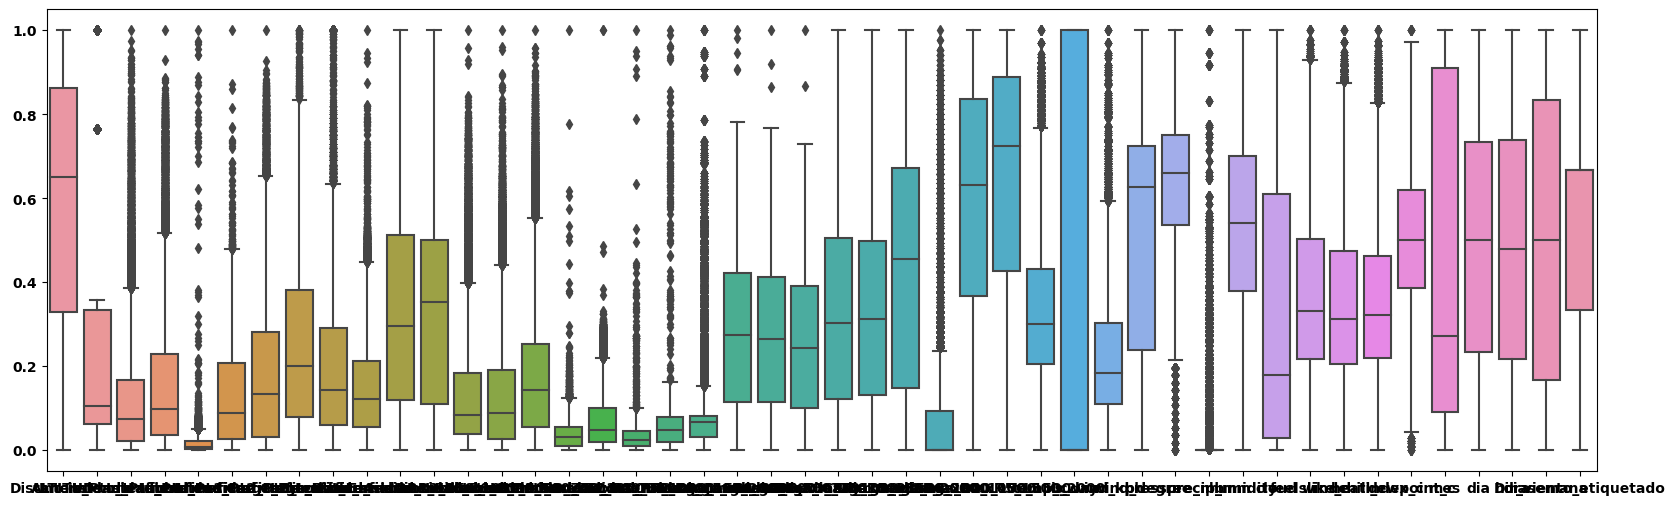

In [13]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

### **Paso 2.**  Dividir el dataset en Training y Test set

In [14]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [15]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

39403
9851


49254

#### **Paso 3.** Cargar y elegir el clasificador __Neural Netwok Classifier (MLPClassifier)__

In [16]:
# Importar el módulo que corresponde al algoritmo
from sklearn.neural_network import MLPClassifier

# Asignar el algoritmo que vamos a aplicar 
clas_mlp = MLPClassifier(random_state=100)

### **Paso 4.** Entrenar el modelo de clasificación Bayesiana con los datos de entrenamiento

In [17]:
# Entrenar el modelo
clas_mlp.fit(X_train, y_train)

/Users/sara/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=100)

Ahora que el modelo está entrenado, sacamos las predicciones, analizamos los resultados y obtenemos algunas métricas del modelo basadas en el conjunto de datos de prueba. Según las métricas, podremos observar si el modelo clasificó correctamente todos los escenarios o no.

### **Paso 5.** Obtener las predicciones 

In [18]:
# Calcular las predicciones con el conjunto de prueba
y_pred = clas_mlp.predict(X_test)

In [19]:
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

[1 1 1 ... 1 1 1]


### **Paso 6.** Evaluación del modelo a través de sus métricas

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9023449396000406

Existen otra serie de metricas para calificar los modelos de clasificación que se detallan a continuación. Algunas de estas medidas se resumen en un informe llamado **classification_report**.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2404
           1       0.92      0.95      0.94      7447

    accuracy                           0.90      9851
   macro avg       0.88      0.85      0.86      9851
weighted avg       0.90      0.90      0.90      9851



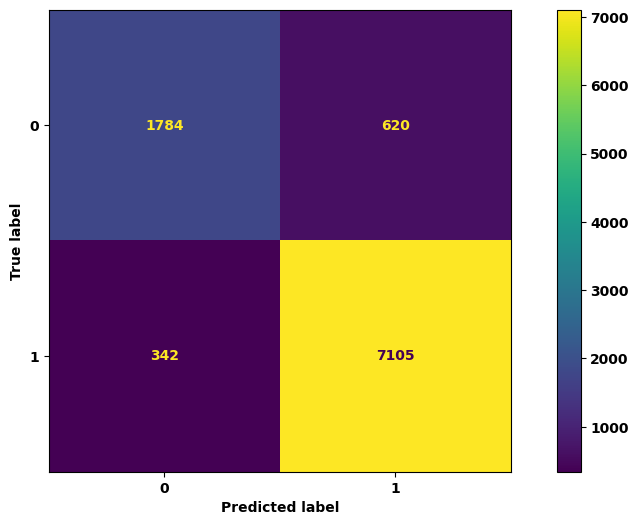

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=clas_mlp.classes_)
disp.plot()

plt.show()

In [23]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8480859862272427

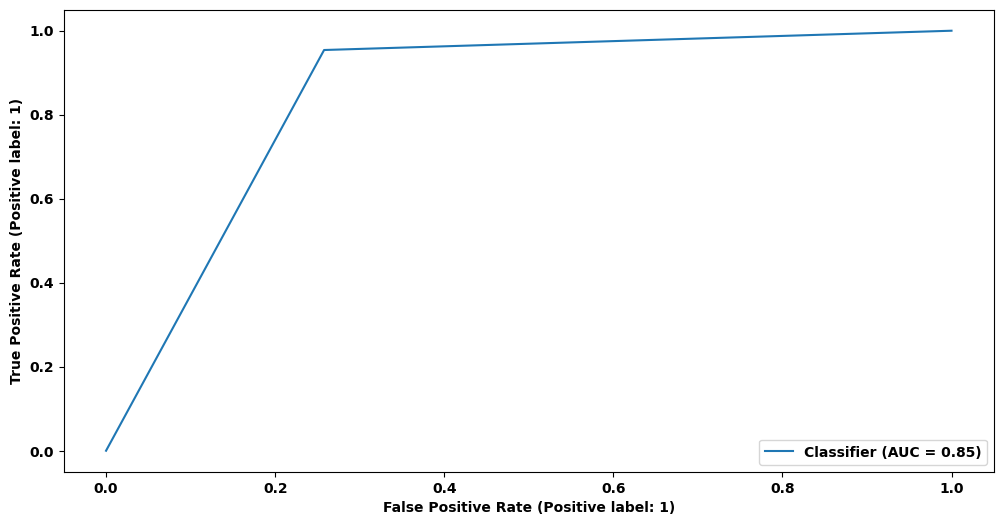

In [24]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

Vamos a obtener más información acerca del modelo:

In [25]:
# Parámetros indicados en la definicón del modelo

clas_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 100,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [26]:
# Sacar diferentes parámetros del modelo que se ha entrenado
clas_mlp.__getstate__()

{'activation': 'relu',
 'solver': 'adam',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'power_t': 0.5,
 'max_iter': 200,
 'loss': 'log_loss',
 'hidden_layer_sizes': (100,),
 'shuffle': True,
 'random_state': 100,
 'tol': 0.0001,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 10,
 'max_fun': 15000,
 'feature_names_in_': array(['ALTITUD', 'Distancia_Pto_trafico1', 'Intensidad_Pto_trafico1',
        'Intensidad_Pto_trafico2', 'Intensidad_Pto_trafico3',
        'Intensidad_Pto_trafico4', 'Intensidad_Pto_trafico5',
        'Carga_Pto_trafico4', 'Carga_Pto_trafico3',
        'Intensidad_mediaR1_500', 'Intensidad_mediaR3_750_1000',
        'Intensidad_mediaR6_2000', 'Intensidad_minR1_500',
        'Intensidad_minR2_500_750', 'Intensidad_minR3_750_1000',
        'Intensi

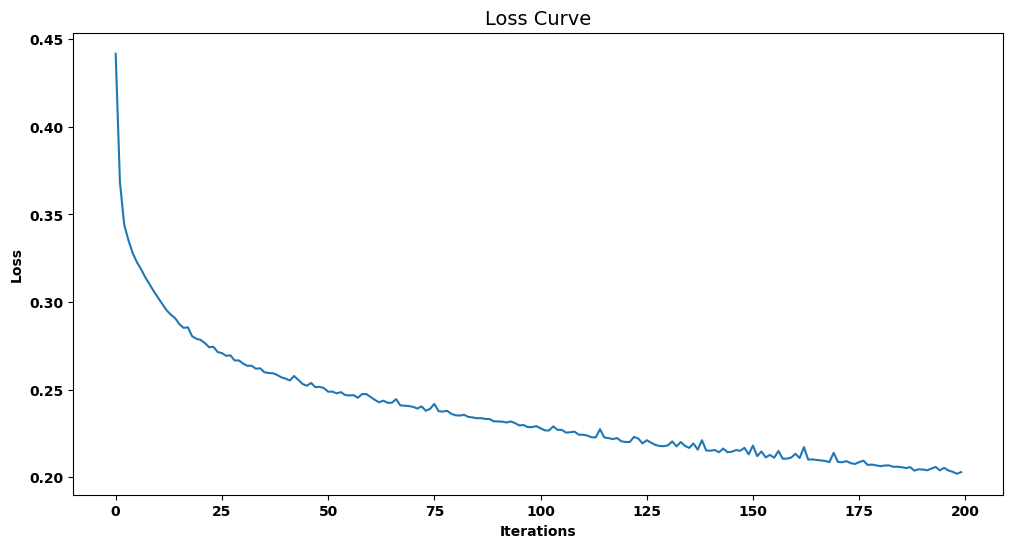

In [27]:
# Se puede consultar incluso el coste (la métrica de error) y su evolución durante las iteraciones de entrenamiento
plt.plot(clas_mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Se puede apreciar que las redes neuronales artificiales disponesn de muchos ajustes y por lo tanto tienen **diversos hiperparámetros** como: 

* ``hidden_layer_sizes``: tupla, longitud = n_capas - 2, predeterminado = (100,). El i-ésimo elemento representa el número de neuronas en la i-ésima capa oculta.
* ``activation``:  {'identity', 'logistic', 'tanh', 'relu'}, predeterminado = 'relu'. La función de activación para las capas ocultas.
* ``solver``:  {'lbfgs', 'sgd', 'adam'}, predeterminado = 'adam'. El solucionador para la optimización del peso.
* ``max_iter``: int, predeterminado = 200. Número máximo de iteraciones. 
* ``alpha``: float, predeterminado = 0.0001. Parámetro de penalización L2 (término de regularización).
* ``tol``: float, predeterminado = 1e-4. Tolerancia para la optimización. Cuando la pérdida o la puntuación no mejoran al menos ``tol`` en ``n_iter_no_change`` iteraciones consecutivas se considera que se ha alcanzado la convergencia y se detiene el entrenamiento.


Procedemos a modificar un par de estos valores y volver a generar una red distinta: 

In [28]:
# Definimos otra red modificando los valores por defecto de algunos hiperparámetros
red_mlp = MLPClassifier(hidden_layer_sizes=(100,200,100),
                        max_iter=10000,
                        alpha=1e-5,
                        tol=1e-5,
                        random_state=100)


# Ajustamos el algoritmo al conjunto de datos de entrenamiento
red_mlp.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_mlp = red_mlp.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_mlp))

print(classification_report(y_test, y_pred_mlp))

print('AUC:', roc_auc_score(y_test, y_pred_mlp))

Acuuracy: 0.919703583392549
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2404
           1       0.94      0.95      0.95      7447

    accuracy                           0.92      9851
   macro avg       0.89      0.89      0.89      9851
weighted avg       0.92      0.92      0.92      9851

AUC: 0.8871728489758016


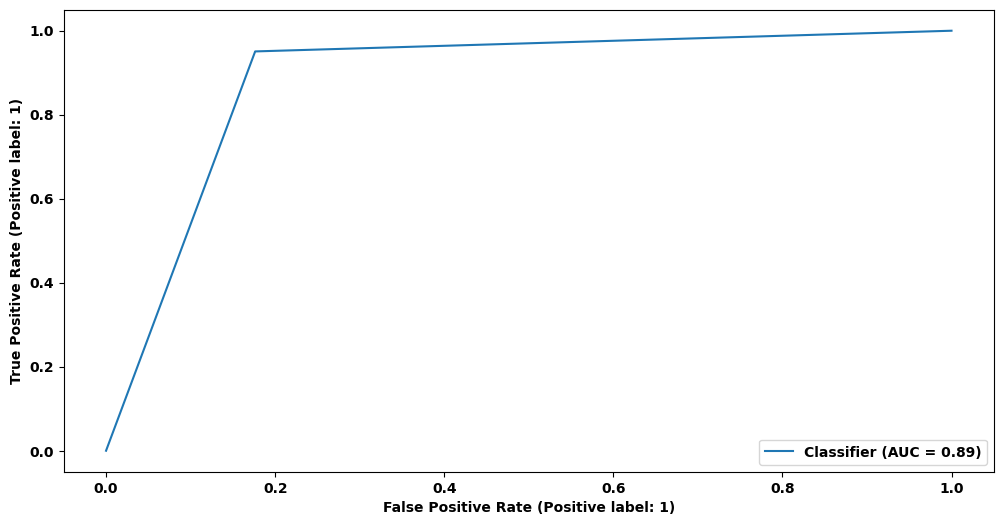

In [29]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_mlp)

plt.show()

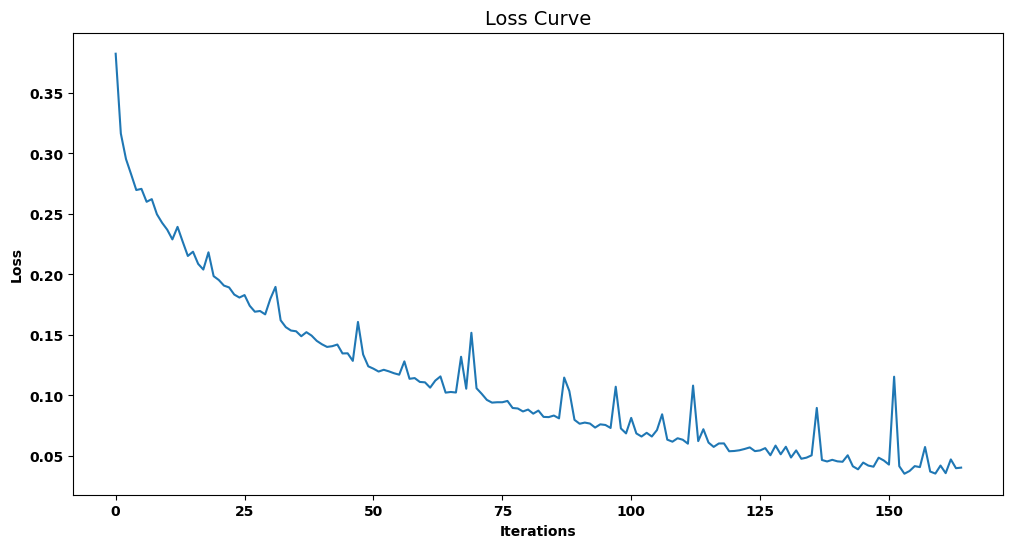

In [30]:
# Se puede consultar incluso el coste (la métrica de error) y su evolución durante las iteraciones de entrenamiento
plt.plot(red_mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

---

## Clasificación con Redes Neuronales profundas mediante ___Keras___

**[Keras](https://keras.io/)** es una librería de Python de código abierto (con licencia MIT) para facilitar el desarrollo de los modelos de __Deep Learning__. _Keras_ es un paquete ___minimalista___ que su principal objetivo es acelerar la generación de redes neuronales profundas.
 _Keras_ funciona como una _interfaz de uso intuitivo_ (__API__) que permite __acceder y trabajar a alto nivel__ con varios frameworks como _Theano_ y sobre todo __`TensorFlow`__.
 
_Keras_ se puede ejecutar sin problema sobre las CPU y también contra las __GPU__ que aumentan la eficiencia computacional en muchos casos.  En lugar de instalar los paquetes por separado, el enfoque recomendado es __instalar _Keras_ como parte de la instalación de _TensorFlow___. A partir de la versión 2.0, cuando instala _TensorFlow_, Keras también se instalará automáticamente.

In [31]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Podemos __importar__ y acceder a las funciones y los métodos de _Keras_ usando dos enfoques distintos:  

- mediante la librería ___Keras___ 
- A través de ___Tensorflow___

Lo importante es __ser consistente en todo el código__ que desarrollamos y usar la mism manera cada vez que importamos los objetos y las funciones de _Keras_ para evitar confusiones y hacer que el código sea más fácil de leer.

In [ ]:
import keras
print(keras.__version__)

In [ ]:
import tensorflow
print(tensorflow.keras.__version__)

In [ ]:
from tensorflow import keras as ks
print(ks.__version__)

_Keras_ como es de esperar y acorde con sus objetivos, tiene un __enfoque muy práctico__ a la hora de definir, compilar y ajustar las redes neuronales profundas. Principalmente se construyen las redes mediante modelos con una secuencia de capas, llamada tipo __`Secuencial`__.

In [ ]:
from keras.models import Sequential

# Declarar el modelo que se va a crear
modelo_ks = Sequential()
modelo_ks

Después de instanciar un modelo de la clase `Sequential`, debemos indicar **la capa de entrada (Input Layer)** que recibe los **valores que se vienen dado al inico** de una observación considerando como un **estímulo inicial**. Lógicamente, el número de las _variables de entrada (__features__)_ determina el tamaño de esta capa. 

In [ ]:
# La dimensión de las observaciones
X_train.shape

In [ ]:
from keras import Input

modelo_ks.add(Input(shape=(X_train.shape[1],)))

Después, se van añadiendo más capas en __el orden deseado__. Por ahora, utilizamos un tipo de capa llamada _capa densa (__Dense__)_ o completamente conectada. Una capa densa tiene una **cantidad específica de neuronas**, que es un parámetro que se eleige en la definición de la capa. 

Este tipo de capas son las **más comunes** y se les conoce como _completamente conectada (__Fully-Connected__)_ porque cada neurona en la capa densa obtiene una conexión con todas las neuronas de entrada o de la capa anterior y todas las neuronas de salida o de la capa posterior. 

![image.png](attachment:image.png)

Se indican las __funciones de activación__ que se aplicarán a cada capa: 

In [ ]:
from keras.layers import Dense

# Añadir las capas ocultas (Hidden Layers)
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))

Finalmente se define la última capa o la __capa de salida (Output Layer)__ que debe tener el tamaño de la salida del modelo.

In [ ]:
# Definir la capa final (Ouput Layer)
modelo_ks.add(Dense(1, activation='sigmoid'))

![image.png](attachment:image.png)


Una vez definida la estructura de la red, se __compila__ el modelo especificando una serie de __hiperparámetros__ como:

* ``loss``: La medida de __error__ o __la función de pérdida (Loss function)__. Por defecto se suele seleccionar `'binary_crossentropy'` que se conoce como ___log-loss___ o la entropía cruzada (_Cross-entropy_) que resume **la diferencia promedio entre las distribuciones de probabilidad real y predicha** para predecir la clase primera clase.  
 
* ``optimizer``: El algoritmo de optimización. se utiliza comunmente `'Adam'` como el algoritmo de descenso de gradiente estocástico (___stochastic gradient descent___) con una eficiencia considerable.
* ``metrics``:  Añade una **lista de métricas** para que el modelo las evalúe durante el entrenamiento, pero que **no influyan en el entrenamiento**. Se utiliza principàlmente `'accuracy'` entre cualquier otra métrica de clasificación en este caso.

In [ ]:
# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Podemos consultar todas las declaraciones realizadas respecto al modelo antes de seguir con el proceso de entrenamiento:

In [ ]:
modelo_ks.summary()

Después de especificar la estructura de la red y los ajustes del algoritmo de clasificación, procedemos a **ajustar el modelo** contra el conjunto de datos de entrenamiento **de forma iterativa** y considerando estos argumentos:  

* ``epochs``: Número de **iteraciones** que se van a realizar para **recorrer todo el conjunto de training**.  

* ``batch_size``: Número de muestras por actualización de gradiente o mejor dicho, la **cantidad de observaciones que se consideran antes de que se actualicen los pesos del modelo** dentro de cada _epoch_. Si no se especifica, el valor predeterminado de *batch_size* es __32__.

In [ ]:
# Ajustar el modelo a los datos del entrenamiento.
modelo_ks.fit(X_train, y_train, epochs=10, batch_size=50)

Ahora tenemos a nuestra red neronal **entrenada y ajustada** a los datos de entrenamiento. Podemos incluso consultar los parámetros o mejor dicho **los pesos de la red** 
 mediante el atributo **`.weights`**:

In [ ]:
modelo_ks.weights

Con el objetivo de evaluar el modelo, podemos **guardar la salida del paso de entrenamiento** para poder registrar las métricas evaluadas en cada _epoch_ y al mismo tiempo entrenar el modelo.

In [ ]:
registros = modelo_ks.fit(X_train, y_train, epochs=10, batch_size=50)

In [ ]:
# Consultar la info registrada
print(registros.epoch)
print(registros.history)

In [ ]:
# Graficamos el rendimiento durante el training
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# Graficamos el rendimiento durante el training
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

Para los modelos desarrollados con _Keras_ podemos usar el método **`.evaluate`** para **evaluar directamente el rendimiento del modelo** sobre cualquier conjunto de datos sin sacar las predicciones explícitamente.

In [ ]:
modelo_ks.evaluate(X_train, y_train)

In [ ]:
_, accuracy_ks_train = modelo_ks.evaluate(X_train, y_train, batch_size=50)
print('Accuracy del modelo en trainig: %.3f' % accuracy_ks_train) 

# El operador % aquí es un "string formatting operator" que se usa para dar formato a una cadena reemplazando el carácter % con un valor.

# El %.3f es un especificador de formato que le dice a Python que formatee el valor de "accuracy_ks" como un número de tipo "float" con 3 decimales.

In [ ]:
print(_)

In [ ]:
# Con este mismo método pòdemos sacar el rendimiento del modelo sobre el conjunto de datos de prueba (test)
_, accuracy_ks_test = modelo_ks.evaluate(X_test, y_test, batch_size=50)
print('Accuracy del modelo en test: %.3f' % accuracy_ks_test) 

Aquí también podemos generar las predicciones del modelo usando el método **`.predict`** sobre el modelo entrenado.

In [ ]:
# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_ks = modelo_ks.predict(X_test)
y_pred_ks

Analizamos la salida directa del modelo que al parecer es en forma de probabilidades que tiene cada observación para pertenecer a la clase 1.

In [ ]:
pd.Series(y_pred_ks).describe()

In [ ]:
# La salida es un array bidimensional
print(y_pred_ks.shape)
print(y_pred_ks.ndim)

In [ ]:
# Redimensionar y reordenar el array
y_pred_ks.reshape(-1)

In [ ]:
# Aplanar los valores del array 
y_pred_ks.flatten()

In [ ]:
# Consultar las características estadística de la salida
pd.Series(y_pred_ks.flatten()).describe().round(4)

In [ ]:
# Consultar el histograma y analizar la distribución de las predicciones
pd.Series(y_pred_ks.reshape(-1)).hist(bins=100, grid=False)

Evidentemente para poder comparar los valores predichos con los reales debemos filtrar las predicciones, cortando las estimaciones por un umbrall (_threshold_).

In [ ]:
np.where(y_pred_ks<0.5, 0, 1)

In [ ]:
threshold = 0.5
y_pred_keras = np.where(y_pred_ks < threshold, 0, 1)
y_pred_keras

In [ ]:
# Ahora calculamos las métricas del siempre con las funciones de sklearn
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

En función del umbrall que se considera para filtrar la salida cruda del modelo, las métricas del modelo pueden variar algo.

In [ ]:
threshold = 0.75
y_pred_keras = np.where(y_pred_ks < threshold, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

El mejor valor de umbral **depende del caso de uso específico** y la compensación (_trade-off_) deseada entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR).

Una forma de encontrar el umbral óptimo para un modelo de clasificación binaria sería analizar la curva de características operativas del receptor (**ROC**). La curva ROC traza la tasa de verdaderos positivos contra la tasa de falsos positivos para un rango de valores de umbral, y **el umbral óptimo** corresponde al punto en la curva ROC que está **más cerca de la esquina superior izquierda** (es decir, el punto con el TPR más alto y el FPR más bajo).

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)

# Sacar el índice del umbral con el TPR más alto y el FPR más bajo
indice_umbral = np.argmax(tpr - fpr)

# Sacar el valor del mejor umbral
umbral_opt = thresholds[indice_umbral]

print("El mejor umbral sería: ", umbral_opt)


In [ ]:
# Ahora volvemos a sacar las métricas usando el umbral "óptimo"
threshold = umbral_opt

y_pred_keras = np.where(y_pred_ks < threshold, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

Podemos juntar todos los pasos implicados en el entrenamiento y validación del modelo.

In [ ]:
# importar los módulos, las clases y las funciones a utilizar
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Declarar el modelo que se va a crear
modelo_ks = Sequential()

modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, epochs=10, batch_size=50)

# lanzamos las predicciones para el conjunto de test 
y_pred_ks = modelo_ks.predict(X_test)

# Sacar el índice del umbral con el TPR más alto y el FPR más bajo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)

# Sacar el valor del mejor umbral
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones 
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras))

print(classification_report(y_test, y_pred_keras))

print('AUC:', roc_auc_score(y_test, y_pred_keras))

Se puede observar que los resultados generados se pueden variar un poco en cada ejecución. Para tener una cierta __reproducibilidad__ en estos análisis podemos **fijar la semilla de diferentes procesos y cálculos estocásticos** a distintos niveles que utilizan varios algoritmos durante el proceso de entrenamiento:

- A nivel de procesos en __`python`__:   Ajustar el generador aleatorio `random` en un valor fijo.
- A nivel de procesos en __`numpy`__:   Ajustar el generador aleatorio `np.random` en un valor fijo.
- A nivel de procesos en __`tensorflow`__:   Ajustar el generador aleatorio `tf.random` en un valor fijo.


In [ ]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 333
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`


# Declarar el modelo que se va a crear
modelo_ks = Sequential()

modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, epochs=50, batch_size=100)

# Calcular las predicciones para el conjunto de test 
y_pred_ks = modelo_ks.predict(X_test)

# Sacar el índice del umbral con el TPR más alto y el FPR más bajo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)
# Sacar el valor del mejor umbral
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones 
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))
print(classification_report(y_test, y_pred_keras))
print('AUC:', roc_auc_score(y_test, y_pred_keras))

Cuando tengamos un númeo mayor de _epochs_ tendrémos una mejor representación en las gráficas de _Loss_ y las métricas del modelo. 

In [ ]:
# Graficamos el rendimiento durante el training
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

El método de **`.fit`** nos permite pasar un conjunto de _validación_, a parte de los datos de _training_, con el objetivo de reservar una parte de los datos y registrar en cada _epoch_ el rendimiento del modelo en los dos conjuntos de datos. 

In [ ]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 333
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`

# Declarar el modelo que se va a crear
modelo_ks = Sequential()
modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

# Calcular las predicciones para el conjunto de test 
y_pred_ks = modelo_ks.predict(X_test)

# Calcular el mejor umbral
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones  y evaluar el modelo
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))
print(classification_report(y_test, y_pred_keras))
print('AUC:', roc_auc_score(y_test, y_pred_keras))



In [ ]:
# Graficamos el rendimiento para el training y test
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.plot(registros.epoch, registros.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# Graficamos el rendimiento para el training y test
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Graficamos el rendimiento para el training y test
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['auc'], linewidth=3, label='training AUC')
plt.plot(registros.epoch, registros.history['val_auc'], linewidth=3, label='test AUC')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('La evolución del área debajo del la curva ROC')
plt.legend(loc = 'lower right')
plt.show()

Volvemos a juntar todos los pasos de generación y evaluación del modelo, silenciando el proceso de ajuste de la red indicando **`verbose=0`**

In [ ]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 333
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`

# Declarar el modelo que se va a crear
modelo_ks = Sequential()
modelo_ks.add(Input(shape=(X_train.shape[1],)))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(200, activation='relu'))
modelo_ks.add(Dense(100, activation='relu'))
modelo_ks.add(Dense(1, activation='sigmoid'))

# Compilar e indicar los ajustes del modelo
modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

# Consultar el resumen del modelo definido
modelo_ks.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_ks.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100, verbose=0)

# Calcular las predicciones para el conjunto de test 
y_pred_ks = modelo_ks.predict(X_test)

# Calcular el mejor umbral
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ks)
indice_umbral = np.argmax(tpr - fpr)
umbral_opt = thresholds[indice_umbral]
print("El mejor umbral sería: ", umbral_opt)

# Filtrar las predicciones  y evaluar el modelo
y_pred_keras = np.where(y_pred_ks < umbral_opt, 0, 1)
print('Acuuracy:', accuracy_score(y_test, y_pred_keras))
print(classification_report(y_test, y_pred_keras))
print('AUC:', roc_auc_score(y_test, y_pred_keras))

# Graficamos la evolución de error (Logic Loss)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.plot(registros.epoch, registros.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

# Graficamos la evolución del porcentaje de acierto (Accuracy)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

# Graficamos la evolución del área debajo del la curva ROC
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['auc'], linewidth=3, label='training AUC')
plt.plot(registros.epoch, registros.history['val_auc'], linewidth=3, label='test AUC')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('La evolución del área debajo del la curva ROC')
plt.legend(loc = 'lower right')
plt.show()


---

### **`Ejercicio 16.1`**

Saca la gráfica del **Learning Curve** con la estructura del último modelo analizado en la sesión, definiendo y aplicando una función nueva considerando los siguientes puntos. Explica si este último modelo tiene un buen rendimiento comparando con modelos anteriores:
- La función toma solamente una entrada para el hiperparámetro `epochs`. Dibuja diferentes curvas para distintos números de iteraciones (_`epochs`_: `{10, 30, 50}`)
- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla = 333`
- Filtra los resultados de cada modelo sin buscar el umbral óptimo (`umbral = 0.5`)
- (*Sugerencia*: No incluyas más de `15` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)

In [ ]:
# Solución
# Ejercicio 16.1
def generate_learning_curve_keras(Epochs=1):
    from sklearn.svm import SVC
    modelo_svc = SVC()

# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],4).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)


    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_svc.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_svc.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_svc.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para el modelo_svc')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right') 

In [ ]:
generate_learning_curve_keras()

---

### **`Ejercicio 16.2`**

**`16.2.1`** Saca la gráfica de **Complexity Curve** con la estructura del último modelo analizado en la sesión, considerando los siguientes puntos. Analiza la curva y explica qué valor sería mejor según este análisis para el número de las iteraciones:
- Considera un rango para asignar al único hiperparámetro que se va a analizar en esta gráfica (número de iteraciones), usando funciones de `numpy`
- `epochs`: `{10,  20,  30,  40,  50,  60,  70,  80,  90, 100}`
- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla = 333`
- Filtra los resultados de cada modelo sin buscar el umbral óptimo (`umbral = 0.5`)
- (*Sugerencia*: No incluyas más de `15` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)


**`16.2.2`** Saca la gráfica de *Complexity Curve* al igual que el punto anterior, **excepto la métrica de clasificación**, considerando el siguiente punto y analiza y compara con los resultados con el ejercicio `16.2.1`.
- La curva muestra la evolución de `AUC` tanto para el conjunto de _training_ como para el dataset de _test_


In [ ]:
# Solución
# Ejercicio 16.2.1
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

def generate_complexity_curve1(Epochs=1):
    # Resetear el estado global de keras
    clear_session()

    # Fijar la semilla para conseguir la reproducibilidad de los resultados
    semilla = 333
    random.seed(semilla)   # Fijar la semilla a nivel de `python`
    np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
    tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`

    # Declarar el modelo que se va a crear
    modelo_ks = Sequential()
    modelo_ks.add(Input(shape=(X_train.shape[1],)))
    modelo_ks.add(Dense(100, activation='relu'))
    modelo_ks.add(Dense(200, activation='relu'))
    modelo_ks.add(Dense(100, activation='relu'))
    modelo_ks.add(Dense(1, activation='sigmoid'))

    # Compilar e indicar los ajustes del modelo
    modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

    # Consultar el resumen del modelo definido
    modelo_ks.summary()

    # Ajustar el modelo a los datos del entrenamiento.
    registros = modelo_ks.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=Epochs, batch_size=100, verbose=0)

    #Nos dan el umbral
    umbral_opt=0.5

    print('Curva de complejidad con Epochs: ',Epochs)
    # Graficamos la evolución del porcentaje de acierto (Accuracy)
    plt.figure(figsize=(20,6))
    plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
    plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
    plt.xticks(registros.epoch)
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.title('La evolución del porcentaje de acierto')
    plt.legend(loc = 'lower right')
    plt.show()

In [ ]:
epochs= [10,  20,  30,  40,  50,  60,  70,  80,  90, 100]
for epoch in epochs:
    generate_complexity_curve1(Epochs=epoch)

In [ ]:
# Solución
# Ejercicio 16.2.2
# Solución
# Ejercicio 16.2.1
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

def generate_complexity_curve2(Epochs=1):
    # Resetear el estado global de keras
    clear_session()

    # Fijar la semilla para conseguir la reproducibilidad de los resultados
    semilla = 333
    random.seed(semilla)   # Fijar la semilla a nivel de `python`
    np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
    tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`

    # Declarar el modelo que se va a crear
    modelo_ks = Sequential()
    modelo_ks.add(Input(shape=(X_train.shape[1],)))
    modelo_ks.add(Dense(100, activation='relu'))
    modelo_ks.add(Dense(200, activation='relu'))
    modelo_ks.add(Dense(100, activation='relu'))
    modelo_ks.add(Dense(1, activation='sigmoid'))

    # Compilar e indicar los ajustes del modelo
    modelo_ks.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

    # Ajustar el modelo a los datos del entrenamiento.
    registros = modelo_ks.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=Epochs, batch_size=100, verbose=0)

    #Nos dan el umbral
    umbral_opt=0.5

    print('Metricas de clasificación con Epochs: ',Epochs)
    # Graficamos la evolución del porcentaje de acierto (Accuracy)
    plt.figure(figsize=(20,6))
    plt.plot(registros.epoch, registros.history['auc'], linewidth=3, label='training AUC')
    plt.plot(registros.epoch, registros.history['val_auc'], linewidth=3, label='test AUC')
    plt.xticks(registros.epoch)
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.title('La evolución del porcentaje de acierto')
    plt.legend(loc = 'lower right')
    plt.show()

In [ ]:
epochs= [10,  20,  30,  40,  50,  60,  70,  80,  90, 100]
for epoch in epochs:
    generate_complexity_curve2(epoch)